<a href="https://colab.research.google.com/github/eaedk/Machine-Learning-Tutorials/blob/main/AXA_Vehicle_Insurance_Claim_Challenge_ML_Step_By_Step_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro
## General
Machine learning allows the user to feed a computer algorithm an immense amount of data and have the computer analyze and make data-driven recommendations and decisions based on only the input data. 
In most of the situations we want to have a machine learning system to make **predictions**, so we have several categories of machine learning tasks depending on the type of prediction needed: **Classification, Regression, Clustering, Generation**, etc.

**Classification** is the task whose goal is the prediction of the label of the class to which the input belongs (e.g., Classification of images in two classes: cats and dogs).
**Regression** is the task whose goal is the prediction of numerical value(s) related to the input (e.g., House rent prediction, Estimated time of arrival ).
**Generation** is the task whose goal is the creation of something new related to the input (e.g., Text translation, Audio beat generation, Image denoising ). **Clustering** is the task of grouping a set of objects in such a way that objects in the same group (called a **cluster**) are more similar (in some sense) to each other than to those in other **clusters** (e.g., Clients clutering).

In machine learning, there are learning paradigms that relate to one aspect of the dataset: **the presence of the label to be predicted**. **Supervised Learning** is the paradigm of learning that is applied when the dataset has the label variables to be predicted, known as ` y variables`. **Unsupervised Learning** is the paradigm of learning that is applied when the dataset has not the label variables to be predicted. **Self-supervised Learning** is the paradigm of learning that is applied when part of the X dataset is considere as the label to be predicted (e.g., the Dataset is made of texts and the model try to predict the next word of each sentence).

## Notebook overview

This notebook is a guide to start practicing Machine Learning.

[AXA Vehicle Insurance Claim Challenge](https://zindi.africa/competitions/umojahack-nigeria)

# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [1]:
!pip install -q -U scikit-learn gdown catboost xgboost lightgbm category_encoders


In [2]:
# !pip list

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [3]:
# Data handling
import pandas as pd

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sb

# EDA (pandas-profiling, etc. )
...

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, LabelEncoder, LabelBinarizer
from category_encoders.binary import BinaryEncoder
from sklearn.compose import ColumnTransformer

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

# from catboost import
# from xgboost import 
# from lightgbm import 

from sklearn.metrics import classification_report, accuracy_score, f1_score

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Other packages
import os, pickle


import warnings
warnings.filterwarnings('ignore')

# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [4]:
# !mkdir dataset/
!gdown -O dataset/ "19sCp2t6H0GDq4_mK7nUv0_Qaa62psYQu" 
!gdown -O dataset/ "165iDRuyi07iEozBInKdxnT8yG0D-VQtc" 
!gdown -O dataset/ "1rR-UUBtdfGas6w1C628AT1HaBA5KeGtl"
!gdown -O dataset/ "12Rk2DbzxoqjP1GWbk9Y6IWMAbsWg8lFd"

Downloading...
From: https://drive.google.com/uc?id=19sCp2t6H0GDq4_mK7nUv0_Qaa62psYQu
To: /content/dataset/VariableDefinitions.csv
100% 539/539 [00:00<00:00, 883kB/s]
Downloading...
From: https://drive.google.com/uc?id=165iDRuyi07iEozBInKdxnT8yG0D-VQtc
To: /content/dataset/Train.csv
100% 1.07M/1.07M [00:00<00:00, 137MB/s]
Downloading...
From: https://drive.google.com/uc?id=1rR-UUBtdfGas6w1C628AT1HaBA5KeGtl
To: /content/dataset/Test.csv
100% 448k/448k [00:00<00:00, 87.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=12Rk2DbzxoqjP1GWbk9Y6IWMAbsWg8lFd
To: /content/dataset/SampleSubmission.csv
100% 57.0k/57.0k [00:00<00:00, 41.3MB/s]


In [5]:
# For CSV, use pandas.read_csv
DATASET_DIR = os.path.join(".", 'dataset')
train = pd.read_csv(os.path.join(DATASET_DIR, 'Train.csv'))
test = pd.read_csv(os.path.join(DATASET_DIR, 'Test.csv'))
ss = pd.read_csv(os.path.join(DATASET_DIR, 'SampleSubmission.csv'))

# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

In [6]:
# Code here

In [7]:
pd.read_csv(os.path.join(DATASET_DIR, 'VariableDefinitions.csv'))

,ID,Unique ID for the customer
0,Policy Start Date,Date policy started
1,Policy End Date,Date policy ended
2,Gender,Gender of the customer
3,Age,Age of the customer
4,ProductName,Name of Insurance policy
5,First Transaction Date,First date payment was made
6,No_Pol,Number of policies the customer has
7,Car_Category,Type of car
8,Subject_Car_Colour,Car colour
9,Subject_Car_Make,Car make


In [8]:
train.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


In [9]:
test.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName
0,009D84L,2010-04-24,2011-03-27,NO GENDER,25,2010-04-24,1,NaN,As Attached,Iveco,Victoria Island,Lagos,CVTP
1,01DO2EQ,2010-01-01,2010-12-31,NaN,120,2010-01-01,4,NaN,As Attached,TOYOTA,Victoria Island,Lagos,Muuve
2,01QM0NU,2010-10-23,2011-10-22,Female,46,2010-10-23,1,NaN,NaN,Ford,Abuja Municipal,Abuja-Municipal,Car Classic
3,024NJLZ,2010-10-14,2011-10-13,Male,32,2010-10-14,1,NaN,NaN,NaN,Kosofe,Benue,Car Classic
4,02BYET3,2010-09-16,2010-12-31,NaN,120,2010-09-16,4,NaN,NaN,TOYOTA,Victoria Island,Lagos,Muuve


In [10]:
train.describe(include=['O'])

,ID,Policy Start Date,Policy End Date,Gender,First Transaction Date,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName
count,12079,12079,12079,11720,12079,8341,5117,9603,5603,5591,12079
unique,12079,376,372,7,376,16,45,74,258,111,9
top,0040R73,2010-03-27,2010-12-31,Male,2010-03-27,Saloon,Black,TOYOTA,Victoria Island,Lagos,Car Classic
freq,1,89,169,7617,89,6034,1880,4975,1162,3186,6485


In [11]:
train.describe()

,Age,No_Pol,target
count,12079.000000,12079.000000,12079.000000
mean,42.234539,1.307227,0.120457
std,97.492565,0.733085,0.325509
min,-6099.000000,1.000000,0.000000
25%,35.000000,1.000000,0.000000
50%,41.000000,1.000000,0.000000
75%,50.000000,1.000000,0.000000
max,320.000000,10.000000,1.000000


In [12]:
train.corr()

,Age,No_Pol,target
Age,1.000000,0.016226,-0.028937
No_Pol,0.016226,1.000000,0.074245
target,-0.028937,0.074245,1.000000


<AxesSubplot:>

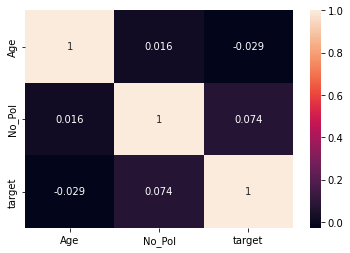

In [13]:
sb.heatmap(train.corr(), annot=True)# use Plotly to do this 

# Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

## Drop Duplicates

In [14]:
# Use pandas.DataFrame.drop_duplicates method
_ = train.shape[0]
train.drop_duplicates(inplace=True)
n_duplicated = _ - train.shape[0]
print("There is no duplicated rows in the dataset") if n_duplicated==0 else print(f"'{n_duplicated}' duplicated rows in the dataset")

There is no duplicated rows in the dataset


## Dataset Splitting

In [15]:
# Please specify 
to_ignore_cols = [
    "ID", # ID
    "Policy Start Date", "Policy End Date", "First Transaction Date"
]

In [16]:
num_cols = list(set(test.select_dtypes('number')).intersection(train.select_dtypes('number')) - set(to_ignore_cols))
cat_cols = list(set(test.select_dtypes(exclude='number')).intersection(train.select_dtypes(exclude='number')) - set(to_ignore_cols))
print(f"The '{len(num_cols)}' numeric columns are : {num_cols}\nThe '{len(cat_cols)}' categorical columns are : {cat_cols}" )

plausible_targets = list(set(train) - set(test))
print(f"The '{len(plausible_targets)}' plausible target columns are : {plausible_targets}")
plausible_targets_dict = {i:col for (i,col) in enumerate(plausible_targets) }
target_col = plausible_targets[0] if len(plausible_targets)==1 else plausible_targets[int(input(f"Please enter the index of your target, {plausible_targets_dict}\n>"))]
print(f"The target is : '{target_col}' of type {train[target_col].dtype}")

The '2' numeric columns are : ['Age', 'No_Pol']
The '7' categorical columns are : ['ProductName', 'LGA_Name', 'Gender', 'Subject_Car_Colour', 'State', 'Car_Category', 'Subject_Car_Make']
The '1' plausible target columns are : ['target']
The target is : 'target' of type int64


In [17]:
train[[target_col]].nunique()

target    2
dtype: int64

array([[<AxesSubplot:title={'center':'target'}>]], dtype=object)

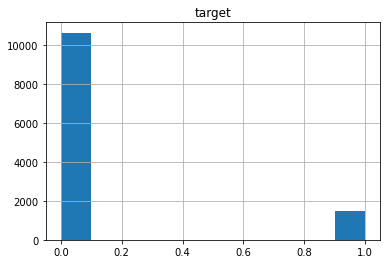

In [18]:
train[[target_col]].hist()

In [19]:
train[plausible_targets].min(), train[plausible_targets].mean(), train[plausible_targets].max()

(target    0
 dtype: int64, target    0.120457
 dtype: float64, target    1
 dtype: int64)

In [20]:
X = train[num_cols+cat_cols]
y = train[target_col] # .values

X_test = test[num_cols+cat_cols]

In [21]:
y.shape

(12079,)

In [22]:
# count occurencies of each unique value
try:
    _ = pd.Series(y.reshape(-1,)).value_counts()
except:
    _ = pd.Series(y.values.reshape(-1,)).value_counts()

_

0    10624
1     1455
dtype: int64

In [23]:
# Use train_test_split with a random_state, and add stratify for Classification
stratify = y if (y.dtype == "O") or (y.nunique()/y.shape[0] < 0.3) else None
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = stratify )  

In [24]:
X_train.shape, y_train.shape

((9663, 9), (9663,))

In [25]:
X_eval.shape, y_eval.shape

((2416, 9), (2416,))

In [26]:
X_test.shape

(5177, 9)

## Impute Missing Values

In [27]:
# Use sklearn.impute.SimpleImputer

In [28]:
print(X_train[num_cols].isna().sum()/X_train.shape[0]) # [0, 1]

Age       0.0
No_Pol    0.0
dtype: float64


In [29]:
print(X_train[cat_cols].isna().sum()/X_train.shape[0]) # [0, 1]

ProductName           0.000000
LGA_Name              0.538342
Gender                0.029390
Subject_Car_Colour    0.576012
State                 0.539480
Car_Category          0.306634
Subject_Car_Make      0.203250
dtype: float64


In [30]:
num_imputer = SimpleImputer(strategy="mean").fit(X_train[num_cols])
cat_imputer = SimpleImputer(strategy="most_frequent").fit(X_train[cat_cols])

In [31]:
# num_imputer = SimpleImputer(strategy="mean")
# num_imputer.fit(X_train[num_cols]) # return the fitted exact SimpleImputer()

In [32]:
# num_imputer.transform(X_train[num_cols]) # numpy array as output

In [33]:
X_train_num_imputed = pd.DataFrame(num_imputer.transform(X_train[num_cols]), columns=num_cols)
X_eval_num_imputed = pd.DataFrame(num_imputer.transform(X_eval[num_cols]), columns=num_cols)
X_test_num_imputed = pd.DataFrame(num_imputer.transform(X_test[num_cols]), columns=num_cols)

X_train_cat_imputed = pd.DataFrame(cat_imputer.transform(X_train[cat_cols]), columns=cat_cols)
X_eval_cat_imputed = pd.DataFrame(cat_imputer.transform(X_eval[cat_cols]), columns=cat_cols)
X_test_cat_imputed = pd.DataFrame(cat_imputer.transform(X_test[cat_cols]), columns=cat_cols)

X_train_imputed = pd.concat([X_train_num_imputed, X_train_cat_imputed], axis=1)
X_eval_imputed = pd.concat([X_eval_num_imputed, X_eval_cat_imputed], axis=1)
X_test_imputed = pd.concat([X_test_num_imputed, X_test_cat_imputed], axis=1)

In [34]:
X_train_imputed.head()

,Age,No_Pol,ProductName,LGA_Name,Gender,Subject_Car_Colour,State,Car_Category,Subject_Car_Make
0,49.0,1.0,Car Classic,Eti-Osa,Male,Black,Eti-Osa,JEEP,TOYOTA
1,47.0,1.0,CarSafe,Victoria Island,Female,Black,Lagos,Saloon,TOYOTA
2,48.0,2.0,Car Classic,Victoria Island,Male,Gold,Lagos,Saloon,TOYOTA
3,43.0,1.0,CarSafe,Victoria Island,Male,Black,Lagos,Saloon,TOYOTA
4,33.0,1.0,Car Classic,Obia/Akpor,Female,Black,Obia-Akpor,Saloon,Honda


In [35]:
X_train_imputed['State'].nunique(), X_train_imputed['State'].unique() # 'N-A'

(103,
 array(['Eti-Osa', 'Lagos', 'Obia-Akpor', 'Awka-South', 'Owerri-Municipal',
        'Ajeromi-Ifelodun', 'Ifako-Ijaye', 'Ijebu-Ode', 'Ife-Central',
        'Ibadan-West', 'Benue', 'Abuja', 'Oyo', 'Delta', 'Kaduna',
        'Oshodi-Isolo', 'Abuja-Municipal', 'Ondo', 'Ilorin-West', 'Ogun',
        'Ibeju-Lekki', 'Akwa-Ibom', 'ENUGU-EAST', 'Warri-Central', 'Edo',
        'Amuwo-Odofin', 'Lagelu-North', 'Calabar-Municipality',
        'Orile-Iganmu', 'Kaduna-North', 'Rivers', 'Imo', 'Jos-North',
        'Ado-Ota', 'QuaAn-Pan', 'Gombe', 'Port-Harcourt', 'Kaduna-South',
        'Enugu-North', 'Nnewi-North', 'Central-Abuja', 'Aniocha-South',
        'Ibadan-North', 'Kano-Municipal', 'Ekiti-West', 'Udi-Agwu', 'Abia',
        'Ogbmosho-South', 'Ogun-Waterside', 'Ife-North', 'Cross-River',
        'Anambra', 'Umuahia-South', 'Osun', 'Ilorin-East', 'Ilesha-East',
        'Jos-South', 'Bauchi', 'Anambra-East', 'ABULE-EGBA', 'Awka-North',
        'Kogi', 'Aboh-Mbaise', 'Akoko-West', 'Oyo-East'

## New Features Creation

### Date Features

[Convert column to datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)

[Extract information from datetime](https://datagy.io/pandas-extract-date-from-datetime/)

In [36]:
date_cols = ["Policy Start Date", "Policy End Date", "First Transaction Date" ]

In [37]:
train[date_cols].head()

,Policy Start Date,Policy End Date,First Transaction Date
0,2010-05-14,2011-05-13,2010-05-14
1,2010-11-29,2011-11-28,2010-11-29
2,2010-03-21,2011-03-20,2010-03-21
3,2010-08-21,2011-08-20,2010-08-21
4,2010-08-29,2010-12-31,2010-08-29


In [38]:
train[date_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 0 to 12078
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Policy Start Date       12079 non-null  object
 1   Policy End Date         12079 non-null  object
 2   First Transaction Date  12079 non-null  object
dtypes: object(3)
memory usage: 377.5+ KB


In [39]:
for i in range(len(date_cols) ):
    train[date_cols[i]] = pd.to_datetime(train[date_cols[i]])
    test[date_cols[i]] = pd.to_datetime(test[date_cols[i]])

In [40]:
train[date_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 0 to 12078
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Policy Start Date       12079 non-null  datetime64[ns]
 1   Policy End Date         12079 non-null  datetime64[ns]
 2   First Transaction Date  12079 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 377.5 KB


In [41]:
# train[date_cols[0]].dt.year # extract the year

In [42]:
train['Policy Start Quater'] = train[date_cols[0]].dt.quarter # extract the year

In [43]:
train.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,Policy Start Quater
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0,2
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1,4
2,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0,1
3,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0,3
4,00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1,3


In [44]:
# X_train['Policy Start Quater'] = train.loc[X_train.index,  'Policy Start Quater']

In [45]:
# X_train.head()

In [46]:
test[date_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5177 entries, 0 to 5176
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Policy Start Date       5177 non-null   datetime64[ns]
 1   Policy End Date         5177 non-null   datetime64[ns]
 2   First Transaction Date  5177 non-null   datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 121.5 KB


In [47]:
train[date_cols].head()

,Policy Start Date,Policy End Date,First Transaction Date
0,2010-05-14,2011-05-13,2010-05-14
1,2010-11-29,2011-11-28,2010-11-29
2,2010-03-21,2011-03-20,2010-03-21
3,2010-08-21,2011-08-20,2010-08-21
4,2010-08-29,2010-12-31,2010-08-29


## Features Encoding




### One-hot

In [48]:
# From sklearn.preprocessing use OneHotEncoder to encode the categorical features.

In [49]:
encoder = OneHotEncoder(sparse=False, drop="first").fit(\
    X_train_cat_imputed.append(X_eval_cat_imputed)\
    .append(X_test_cat_imputed)\
    )
cat_encoded_cols = encoder.get_feature_names_out().tolist()

#### Set manually output as dataframe

In [50]:
X_train_cat_encoded = pd.DataFrame(encoder.transform(X_train_cat_imputed), columns=cat_encoded_cols)
X_eval_cat_encoded = pd.DataFrame(encoder.transform(X_eval_cat_imputed), columns=cat_encoded_cols)
X_test_cat_encoded = pd.DataFrame(encoder.transform(X_test_cat_imputed), columns=cat_encoded_cols)

In [51]:
X_train_cat_encoded.head()

,ProductName_Car Classic,ProductName_Car Plus,ProductName_Car Vintage,ProductName_CarFlex,ProductName_CarSafe,ProductName_Customized Motor,ProductName_Motor Cycle,ProductName_Muuve,LGA_Name_AGBARA,LGA_Name_AJAO ESTATE,...,Subject_Car_Make_Skoda,Subject_Car_Make_Subaru,Subject_Car_Make_Suzuki,Subject_Car_Make_TOYOTA,Subject_Car_Make_Tata,Subject_Car_Make_Volkswagen,Subject_Car_Make_Volvo,Subject_Car_Make_Wrangler Jeep,Subject_Car_Make_Yamaha,Subject_Car_Make_ZOYTE
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
X_train_cat_encoded.shape

(9663, 528)

#### Set automatically output as dataframe

In [53]:
encoder.set_output(transform="pandas")

OneHotEncoder(drop='first', sparse=False, sparse_output=False)

In [54]:
encoder.transform(X_train_cat_imputed)

,ProductName_Car Classic,ProductName_Car Plus,ProductName_Car Vintage,ProductName_CarFlex,ProductName_CarSafe,ProductName_Customized Motor,ProductName_Motor Cycle,ProductName_Muuve,LGA_Name_AGBARA,LGA_Name_AJAO ESTATE,...,Subject_Car_Make_Skoda,Subject_Car_Make_Subaru,Subject_Car_Make_Suzuki,Subject_Car_Make_TOYOTA,Subject_Car_Make_Tata,Subject_Car_Make_Volkswagen,Subject_Car_Make_Volvo,Subject_Car_Make_Wrangler Jeep,Subject_Car_Make_Yamaha,Subject_Car_Make_ZOYTE
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9658,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9659,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9660,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9661,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Binary

In [55]:
enc = BinaryEncoder(drop_invariant=False, return_df=True,).fit(\
    X_train_cat_imputed.append(X_eval_cat_imputed)\
    .append(X_test_cat_imputed)\
    )

In [56]:
enc.transform(X_train_cat_imputed).head()

,ProductName_0,ProductName_1,ProductName_2,ProductName_3,LGA_Name_0,LGA_Name_1,LGA_Name_2,LGA_Name_3,LGA_Name_4,LGA_Name_5,...,Car_Category_2,Car_Category_3,Car_Category_4,Subject_Car_Make_0,Subject_Car_Make_1,Subject_Car_Make_2,Subject_Car_Make_3,Subject_Car_Make_4,Subject_Car_Make_5,Subject_Car_Make_6
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [57]:
enc = BinaryEncoder(drop_invariant=True, return_df=True,).fit(\
    X_train_cat_imputed.append(X_eval_cat_imputed)\
    .append(X_test_cat_imputed)\
    )

In [58]:
X_train_cat_encoded.shape # previous shape :(9663, 528)

(9663, 528)

In [59]:
X_train_cat_encoded = enc.transform(X_train_cat_imputed)
X_eval_cat_encoded = enc.transform(X_eval_cat_imputed)
X_test_cat_encoded = enc.transform(X_test_cat_imputed)

In [60]:
X_train_cat_encoded.head()

,ProductName_0,ProductName_1,ProductName_2,ProductName_3,LGA_Name_0,LGA_Name_1,LGA_Name_2,LGA_Name_3,LGA_Name_4,LGA_Name_5,...,Car_Category_2,Car_Category_3,Car_Category_4,Subject_Car_Make_0,Subject_Car_Make_1,Subject_Car_Make_2,Subject_Car_Make_3,Subject_Car_Make_4,Subject_Car_Make_5,Subject_Car_Make_6
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [61]:
X_train_cat_encoded.shape # new shape :(9663, 40) with binary encoding and drop_invariant=True  

(9663, 40)

## Features Scaling


In [62]:
# From sklearn.preprocessing use StandardScaler, MinMaxScaler, etc.

In [63]:
scaler = StandardScaler().fit(X_train_num_imputed).set_output(transform="pandas")

In [64]:
# Previous method
# X_train_num_scaled = pd.DataFrame(scaler.transform(X_train_num_imputed), columns=num_cols)
# X_eval_num_scaled = pd.DataFrame(scaler.transform(X_eval_num_imputed), columns=num_cols)
# X_test_num_scaled = pd.DataFrame(scaler.transform(X_test_num_imputed), columns=num_cols)

# Actual method

X_train_num_scaled = scaler.transform(X_train_num_imputed)
X_eval_num_scaled = scaler.transform(X_eval_num_imputed)
X_test_num_scaled = scaler.transform(X_test_num_imputed)

In [65]:
X_train_num_scaled.head()

,Age,No_Pol
0,0.074750,-0.416072
1,0.052460,-0.416072
2,0.063605,0.953775
3,0.007879,-0.416072
4,-0.103573,-0.416072


## Association of numeric and categorical variables

In [66]:
X_train_ready = pd.concat([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_eval_ready = pd.concat([X_eval_num_scaled, X_eval_cat_encoded], axis=1)
X_test_ready = pd.concat([X_test_num_scaled, X_test_cat_encoded], axis=1)

In [67]:
X_train_ready.head() #with one-hot : 530 columns

,Age,No_Pol,ProductName_0,ProductName_1,ProductName_2,ProductName_3,LGA_Name_0,LGA_Name_1,LGA_Name_2,LGA_Name_3,...,Car_Category_2,Car_Category_3,Car_Category_4,Subject_Car_Make_0,Subject_Car_Make_1,Subject_Car_Make_2,Subject_Car_Make_3,Subject_Car_Make_4,Subject_Car_Make_5,Subject_Car_Make_6
0,0.074750,-0.416072,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.052460,-0.416072,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0.063605,0.953775,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0.007879,-0.416072,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,-0.103573,-0.416072,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [68]:
X_eval_ready.head()

,Age,No_Pol,ProductName_0,ProductName_1,ProductName_2,ProductName_3,LGA_Name_0,LGA_Name_1,LGA_Name_2,LGA_Name_3,...,Car_Category_2,Car_Category_3,Car_Category_4,Subject_Car_Make_0,Subject_Car_Make_1,Subject_Car_Make_2,Subject_Car_Make_3,Subject_Car_Make_4,Subject_Car_Make_5,Subject_Car_Make_6
0,-0.248460,2.323622,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0.041314,-0.416072,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0.141621,-0.416072,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,-0.025557,-0.416072,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0.364525,-0.416072,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [69]:
X_test_ready.head()

,Age,No_Pol,ProductName_0,ProductName_1,ProductName_2,ProductName_3,LGA_Name_0,LGA_Name_1,LGA_Name_2,LGA_Name_3,...,Car_Category_2,Car_Category_3,Car_Category_4,Subject_Car_Make_0,Subject_Car_Make_1,Subject_Car_Make_2,Subject_Car_Make_3,Subject_Car_Make_4,Subject_Car_Make_5,Subject_Car_Make_6
0,-0.192734,-0.416072,0,1,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,0.866058,3.693469,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0.041314,-0.416072,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,1
3,-0.114718,-0.416072,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0.866058,3.693469,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


## Optional: Train Dataset Balancing 

In [70]:
# Use Over-sampling/Under-sampling methods, more details here: https://imbalanced-learn.org/stable/install.html

# Machine Learning Modeling 
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.

In [71]:
models_trained = []

## Simple Model #001

Please, keep the following structure to try all the model you want.

### Create the Model

In [72]:
# Code here

In [73]:
# knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

### Train the Model

In [74]:
# Use the .fit method

In [75]:
# knn.fit(X_train_ready, y_train)
dt.fit(X_train_ready, y_train)

DecisionTreeClassifier()

In [76]:
# models_trained.append(knn)
models_trained.append(dt)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [77]:
# Compute the valid metrics for the use case # Optional: show the classification report 

In [78]:
# y_eval_pred = knn.predict(X_eval_ready)
y_eval_pred = dt.predict(X_eval_ready)

In [79]:
print(classification_report(y_true=y_eval, y_pred=y_eval_pred,
                    #   labels=None, 
                    # target_names=["Bad", "Good"], 
                      ))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      2125
           1       0.25      0.20      0.22       291

    accuracy                           0.83      2416
   macro avg       0.57      0.56      0.56      2416
weighted avg       0.81      0.83      0.82      2416



```python3
# previous results
         precision    recall  f1-score   support

               1       0.89      0.93      0.91      2125
               0       0.23      0.16      0.19       291

        accuracy                           0.83      2416
       macro avg       0.56      0.54      0.55      2416
    weighted avg       0.81      0.83      0.82      2416
```

### Predict on an unknown dataset (Testset)

In [80]:
# Use .predict method # .predict_proba is available just for classification

## Simple Model #002

### Create the Model

In [81]:
# Code here

In [82]:
ada = AdaBoostClassifier()

### Train the Model

In [83]:
# Use the .fit method

In [84]:
ada.fit(X_train_ready, y_train)

AdaBoostClassifier()

In [85]:
models_trained.append(ada)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [86]:
# Compute the valid metrics for the use case # Optional: show the classification report 

### Predict on a unknown dataset (Testset)

In [87]:
# Use .predict method # .predict_proba is available just for classification

## Model #003 : Pipeline

### Create the Model

In [88]:
# Core components of the pipeplies
## Imputers
num_imputer = SimpleImputer(strategy="mean").fit(X_train[num_cols])
cat_imputer = SimpleImputer(strategy="most_frequent").fit(X_train[cat_cols])

# Encoder
enc = BinaryEncoder(drop_invariant=True, return_df=True, handle_unknown="indicator").fit(\
    X_train_cat_imputed.append(X_eval_cat_imputed)\
    .append(X_test_cat_imputed)\
    )

# Scaler
scaler = StandardScaler().fit(X_train_num_imputed).set_output(transform="pandas")

In [89]:
# feature pipelines
num_pipe = Pipeline( steps=[("num_imputer", num_imputer), ("scaler", scaler)])
cat_pipe = Pipeline( steps=[("cat_imputer", cat_imputer), ("encoder", enc)])

# end2end features preprocessor
preprocessor = ColumnTransformer(
    (
        ("numerical", num_pipe, num_cols),
        ("categorical", cat_pipe, cat_cols,),
    #  ("date", date_pipe, date_cols,),
    ),
    # verbose_feature_names_out=False,
)
preprocessor.set_output(transform="pandas")

# end2end pipeline
clf = Pipeline([('preprocessor', preprocessor), ('classifier', KNeighborsClassifier())])
clf.set_output(transform="pandas")

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=(('numerical',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'No_Pol']),
                                                 ('categorical',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   BinaryEncoder(cols=['ProductName',
                                                                                       'LGA_Name',
                                                                                       'Gender',
                                                                                       'Subject_Car_Colour',
                                                                                       'Sta...
 73                   1                   0                   0   
 74                   1                   0                   0   
 75                   1                   0                   0   
-1                    1                   0                   0   
-2                    0                   0                   0   

     Subject_Car_Make_3  Subject_Car_Make_4  Subject_Car_Make_5  \
 1                    0                   0                   0   
 2                    0                   0                   1   
 3                    0                   0                   1   
 4                    0                   1                   0   
 5                    0                   1                   0   
..                  ...                 ...                 ...   
 73                   1                   0                   0   
 74                   1                   0                   1   
 75                   1                   0                   1   
-1                    1                   1                   0   
-2                    0                   0                   0   

     Subject_Car_Make_6  
 1                    1  
 2                    0  
 3                    1  
 4                    0  
 5                    1  
..                  ...  
 73                   1  
 74                   0  
 75                   1  
-1                    0  
-2                    0  

[77 rows x 7 columns]}]))]),
                                                  ['ProductName', 'LGA_Name',
                                                   'Gender',
                                                   'Subject_Car_Colour',
                                                   'State', 'Car_Category',
                                                   'Subject_Car_Make'])))),
                ('classifier', KNeighborsClassifier())])

In [90]:
X_train.head()

,Age,No_Pol,ProductName,LGA_Name,Gender,Subject_Car_Colour,State,Car_Category,Subject_Car_Make
4007,49,1,Car Classic,Eti-Osa,Male,Black,Eti-Osa,JEEP,TOYOTA
10204,47,1,CarSafe,NaN,Female,NaN,NaN,Saloon,TOYOTA
6277,48,2,Car Classic,NaN,Male,Gold,NaN,Saloon,TOYOTA
12008,43,1,CarSafe,NaN,Male,NaN,NaN,Saloon,TOYOTA
11219,33,1,Car Classic,Obia/Akpor,Female,NaN,Obia-Akpor,Saloon,Honda


In [91]:
preprocessor.fit_transform(X_train)

,numerical__Age,numerical__No_Pol,categorical__ProductName_0,categorical__ProductName_1,categorical__ProductName_2,categorical__ProductName_3,categorical__LGA_Name_0,categorical__LGA_Name_1,categorical__LGA_Name_2,categorical__LGA_Name_3,...,categorical__Car_Category_1,categorical__Car_Category_2,categorical__Car_Category_3,categorical__Subject_Car_Make_0,categorical__Subject_Car_Make_1,categorical__Subject_Car_Make_2,categorical__Subject_Car_Make_3,categorical__Subject_Car_Make_4,categorical__Subject_Car_Make_5,categorical__Subject_Car_Make_6
4007,0.074750,-0.416072,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
10204,0.052460,-0.416072,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
6277,0.063605,0.953775,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
12008,0.007879,-0.416072,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
11219,-0.103573,-0.416072,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4374,-0.025557,3.693469,0,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
7362,0.063605,2.323622,0,0,0,1,0,1,1,0,...,0,0,1,0,0,0,0,1,1,1
10604,-0.058992,-0.416072,0,0,0,1,1,1,1,0,...,0,1,0,0,0,0,0,0,0,1
39,-0.036702,0.953775,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


### Train the Model

In [92]:
# Use the .fit method

In [93]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=(('numerical',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'No_Pol']),
                                                 ('categorical',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   BinaryEncoder(cols=['ProductName',
                                                                                       'LGA_Name',
                                                                                       'Gender',
                                                                                       'Subject_Car_Colour',
                                                                                       'Sta...
 73                   1                   0                   0   
 74                   1                   0                   0   
 75                   1                   0                   0   
-1                    1                   0                   0   
-2                    0                   0                   0   

     Subject_Car_Make_3  Subject_Car_Make_4  Subject_Car_Make_5  \
 1                    0                   0                   0   
 2                    0                   0                   1   
 3                    0                   0                   1   
 4                    0                   1                   0   
 5                    0                   1                   0   
..                  ...                 ...                 ...   
 73                   1                   0                   0   
 74                   1                   0                   1   
 75                   1                   0                   1   
-1                    1                   1                   0   
-2                    0                   0                   0   

     Subject_Car_Make_6  
 1                    1  
 2                    0  
 3                    1  
 4                    0  
 5                    1  
..                  ...  
 73                   1  
 74                   0  
 75                   1  
-1                    0  
-2                    0  

[77 rows x 7 columns]}]))]),
                                                  ['ProductName', 'LGA_Name',
                                                   'Gender',
                                                   'Subject_Car_Colour',
                                                   'State', 'Car_Category',
                                                   'Subject_Car_Make'])))),
                ('classifier', KNeighborsClassifier())])

In [94]:
models_trained.append(clf)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [95]:
# Compute the valid metrics for the use case # Optional: show the classification report 

In [96]:
X_eval.head()

,Age,No_Pol,ProductName,LGA_Name,Gender,Subject_Car_Colour,State,Car_Category,Subject_Car_Make
7050,20,3,Muuve,Lagos,Entity,As Attached,Lagos,NaN,NaN
4023,46,1,Car Classic,NaN,Female,Ash,NaN,Saloon,TOYOTA
6666,55,1,Car Classic,NaN,Female,Black,NaN,Saloon,TOYOTA
3436,40,1,Car Classic,Lagos Island,Female,NaN,Lagos,Saloon,TOYOTA
7861,75,1,CarSafe,NaN,Female,NaN,NaN,JEEP,TOYOTA


In [97]:
y_eval_pred = clf.predict(X_eval)
print(classification_report(y_true=y_eval, y_pred=y_eval_pred,
                    #   labels=None, 
                    # target_names=["", ""], 
                      ))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93      2125
           1       0.34      0.14      0.20       291

    accuracy                           0.86      2416
   macro avg       0.62      0.55      0.56      2416
weighted avg       0.83      0.86      0.84      2416



### Predict on a unknown dataset (Testset)

In [98]:
# Use .predict method # .predict_proba is available just for classification

## Models comparison
Create a pandas dataframe that will allow you to compare your models.

Find a sample frame below :

|     | Model_Name     | Metric (metric_name)    | Details  |
|:---:|:--------------:|:--------------:|:-----------------:|
| 0   |  -             |  -             | -                 |
| 1   |  -             |  -             | -                 |


You might use the pandas dataframe method `.sort_values()` to sort the dataframe regarding the metric.

In [99]:
metric = f1_score

In [100]:
len(models_trained)

3

In [101]:
info = [ {"Model_Name": model.__str__(),
          f"Metric ({metric.__name__})": metric(
              y_true=y_eval,
              y_pred=model.predict(X_eval_ready),
              ),
          } for model in models_trained[:-1] ] + \
          [ {"Model_Name":"pipeline",
          f"Metric ({metric.__name__})": metric(
              y_true=y_eval,
              y_pred=model.predict(X_eval),
              ),
          } for model in models_trained[-1:] ]

In [102]:
pd.DataFrame(info).sort_values(ascending=False, by=f"Metric ({metric.__name__})")

,Model_Name,Metric (f1_score)
0,DecisionTreeClassifier(),0.217973
2,pipeline,0.203390
1,AdaBoostClassifier(),0.079755


## Hyperparameters tuning 

Fine-tune the Top-k models (3 < k < 5) using a ` GridSearchCV`  (that is in sklearn.model_selection
) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

In [103]:
best_models_trained = []

### Hp tuning model #1

In [104]:
models_trained[0]

DecisionTreeClassifier()

In [105]:
models_trained[0].get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [106]:
parameters = {
 'criterion': ["gini","entropy", "log_loss" ],
 'random_state': [10],
 'min_samples_leaf': [1, 2, 5,],
 'min_samples_split': [2, 5, 10, 15],}

In [107]:
# parameters = {
#  'leaf_size': [10, 20, 30, 40],
#  'metric': ['minkowski'],
#  'n_neighbors': [3, 5, 10, 15],}

In [108]:
# instantiate the Searcher
searcher = GridSearchCV(
    estimator=models_trained[0],
    param_grid=parameters,
    scoring=['accuracy', 'balanced_accuracy', 'f1', 'precision', 'recall', 'roc_auc'],
    refit='balanced_accuracy', # True
    cv=5, #StratifiedKFold(n_splits=5, shuffle=True, random_state=1) #(4 train, 1 test)
    verbose=3 #verbose=3 # Show the steps as output
)

In [109]:
# if cv=3, 
# 1/3 size of the eval, 
# (cv-1)/3 size of the train

In [110]:
searcher.fit(X_train_ready, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END criterion=gini, min_samples_leaf=1, min_samples_split=2, random_state=10; accuracy: (test=0.833) balanced_accuracy: (test=0.577) f1: (test=0.257) precision: (test=0.277) recall: (test=0.240) roc_auc: (test=0.634) total time=   0.1s
[CV 2/5] END criterion=gini, min_samples_leaf=1, min_samples_split=2, random_state=10; accuracy: (test=0.824) balanced_accuracy: (test=0.561) f1: (test=0.227) precision: (test=0.240) recall: (test=0.215) roc_auc: (test=0.622) total time=   0.1s
[CV 3/5] END criterion=gini, min_samples_leaf=1, min_samples_split=2, random_state=10; accuracy: (test=0.813) balanced_accuracy: (test=0.570) f1: (test=0.243) precision: (test=0.238) recall: (test=0.249) roc_auc: (test=0.581) total time=   0.0s
[CV 4/5] END criterion=gini, min_samples_leaf=1, min_samples_split=2, random_state=10; accuracy: (test=0.823) balanced_accuracy: (test=0.566) f1: (test=0.237) precision: (test=0.245) recall: (test=0.228)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10, 15],
                         'random_state': [10]},
             refit='balanced_accuracy',
             scoring=['accuracy', 'balanced_accuracy', 'f1', 'precision',
                      'recall', 'roc_auc'],
             verbose=3)

In [111]:
search_history = pd.DataFrame(searcher.cv_results_)
search_history

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_leaf,param_min_samples_split,param_random_state,params,split0_test_accuracy,...,std_test_recall,rank_test_recall,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,split4_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
0,0.034772,0.001702,0.017685,0.001607,gini,1,2,10,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.832902,...,0.017053,1,0.634297,0.621789,0.581154,0.599858,0.581417,0.603703,0.021368,34
1,0.034393,0.001971,0.020152,0.003672,gini,1,5,10,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.841180,...,0.031413,10,0.657988,0.644351,0.604457,0.625023,0.621864,0.630737,0.018601,31
2,0.037389,0.005867,0.022965,0.007304,gini,1,10,10,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.845835,...,0.010795,8,0.676936,0.662706,0.648026,0.650986,0.665458,0.660823,0.010442,20
3,0.052332,0.002672,0.028157,0.001494,gini,1,15,10,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.860321,...,0.026247,21,0.703877,0.681954,0.674917,0.661634,0.684960,0.681468,0.013790,16
4,0.052537,0.002276,0.029104,0.004234,gini,2,2,10,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.849974,...,0.030084,20,0.666012,0.636492,0.613706,0.648560,0.626140,0.638182,0.018051,28
5,0.050065,0.000732,0.025764,0.000256,gini,2,5,10,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.854113,...,0.029202,19,0.670404,0.633776,0.613682,0.649233,0.625674,0.638554,0.019676,27
6,0.051699,0.002637,0.026629,0.000792,gini,2,10,10,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.847905,...,0.018729,9,0.689124,0.660693,0.651313,0.677733,0.664612,0.668695,0.013281,19
7,0.049264,0.001799,0.028542,0.001747,gini,2,15,10,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.862907,...,0.019996,28,0.703748,0.685651,0.681351,0.674184,0.697006,0.688388,0.010667,13
8,0.046498,0.000872,0.028498,0.003031,gini,5,2,10,"{'criterion': 'gini', 'min_samples_leaf': 5, '...",0.866529,...,0.027899,29,0.720082,0.668557,0.681217,0.698226,0.701271,0.693871,0.017673,4
9,0.046027,0.001783,0.031198,0.006091,gini,5,5,10,"{'criterion': 'gini', 'min_samples_leaf': 5, '...",0.866529,...,0.027899,29,0.720082,0.668557,0.681217,0.698226,0.701271,0.693871,0.017673,4


In [112]:
searcher.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'random_state': 10}

In [113]:
searcher.best_estimator_

DecisionTreeClassifier(criterion='entropy', min_samples_split=10,
                       random_state=10)

In [114]:
best_models_trained.append(searcher.best_estimator_)

### Hp tuning model #2

In [115]:
models_trained[1].get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [116]:
parameters = {
 'n_estimators': [30, 50, 100, 200, 300],
 'random_state': [10],}

In [117]:
# instantiate the Searcher
searcher = GridSearchCV(
    estimator=models_trained[1],
    param_grid=parameters,
    scoring=['accuracy', 'balanced_accuracy', 'f1', 'precision', 'recall', 'roc_auc'],
    refit='balanced_accuracy', # True
    cv=5, #StratifiedKFold(n_splits=5, shuffle=True, random_state=1) #(4 train, 1 test)
    verbose=3 #verbose=3 # Show the steps as output
)

In [118]:
searcher.fit(X_train_ready, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END n_estimators=30, random_state=10; accuracy: (test=0.880) balanced_accuracy: (test=0.536) f1: (test=0.141) precision: (test=0.528) recall: (test=0.082) roc_auc: (test=0.768) total time=   0.3s
[CV 2/5] END n_estimators=30, random_state=10; accuracy: (test=0.873) balanced_accuracy: (test=0.509) f1: (test=0.054) precision: (test=0.269) recall: (test=0.030) roc_auc: (test=0.772) total time=   0.3s
[CV 3/5] END n_estimators=30, random_state=10; accuracy: (test=0.882) balanced_accuracy: (test=0.533) f1: (test=0.129) precision: (test=0.567) recall: (test=0.073) roc_auc: (test=0.737) total time=   0.3s
[CV 4/5] END n_estimators=30, random_state=10; accuracy: (test=0.885) balanced_accuracy: (test=0.540) f1: (test=0.152) precision: (test=0.645) recall: (test=0.086) roc_auc: (test=0.764) total time=   0.3s
[CV 5/5] END n_estimators=30, random_state=10; accuracy: (test=0.881) balanced_accuracy: (test=0.531) f1: (test=0.123) p

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [30, 50, 100, 200, 300],
                         'random_state': [10]},
             refit='balanced_accuracy',
             scoring=['accuracy', 'balanced_accuracy', 'f1', 'precision',
                      'recall', 'roc_auc'],
             verbose=3)

In [119]:
search_history = pd.DataFrame(searcher.cv_results_)
search_history

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_random_state,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,std_test_recall,rank_test_recall,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,split4_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
0,0.233536,0.006158,0.053927,0.004812,30,10,"{'n_estimators': 30, 'random_state': 10}",0.880497,0.873254,0.881531,...,0.019903,5,0.767855,0.771543,0.736644,0.764168,0.785540,0.765150,0.015985,5
1,0.431386,0.089558,0.090550,0.015879,50,10,"{'n_estimators': 50, 'random_state': 10}",0.879979,0.874289,0.878945,...,0.023230,4,0.765998,0.764524,0.743228,0.765995,0.788089,0.765567,0.014197,4
2,0.866164,0.167853,0.147562,0.027755,100,10,"{'n_estimators': 100, 'random_state': 10}",0.879979,0.875841,0.879462,...,0.014281,3,0.767377,0.769919,0.744182,0.771842,0.790604,0.768785,0.014792,3
3,1.621276,0.345485,0.269793,0.047639,200,10,"{'n_estimators': 200, 'random_state': 10}",0.879462,0.875841,0.879979,...,0.013250,1,0.770178,0.768185,0.750052,0.776435,0.794063,0.771783,0.014183,2
4,2.356540,0.404913,0.347879,0.005523,300,10,"{'n_estimators': 300, 'random_state': 10}",0.878427,0.874806,0.879462,...,0.012917,2,0.772864,0.769999,0.752506,0.777632,0.795353,0.773671,0.013769,1


In [120]:
searcher.best_params_

{'n_estimators': 200, 'random_state': 10}

In [121]:
searcher.best_estimator_

AdaBoostClassifier(n_estimators=200, random_state=10)

In [122]:
best_models_trained.append(searcher.best_estimator_)

### Hp tuning model #3 : Pipeline

In [123]:
parameters = {
    'preprocessor__numerical__scaler': [StandardScaler(), 
                                        RobustScaler()],
 'classifier__leaf_size': [10, 20, 30, 40],
 'classifier__metric': ['minkowski'],
 'classifier__n_neighbors': [3, 5, 10, 15],
 }

In [124]:
# instantiate the Searcher
searcher = GridSearchCV(
    estimator=models_trained[-1],
    param_grid=parameters,
    scoring=['accuracy', 'balanced_accuracy', 'f1', 'precision', 'recall', 'roc_auc'],
    refit='balanced_accuracy', # True
    cv=5, #StratifiedKFold(n_splits=5, shuffle=True, random_state=1) #(4 train, 1 test)
    verbose=3 #verbose=3 # Show the steps as output
)

In [125]:
searcher.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END classifier__leaf_size=10, classifier__metric=minkowski, classifier__n_neighbors=3, preprocessor__numerical__scaler=StandardScaler(); accuracy: (test=0.864) balanced_accuracy: (test=0.589) f1: (test=0.287) precision: (test=0.390) recall: (test=0.227) roc_auc: (test=0.691) total time=   0.6s
[CV 2/5] END classifier__leaf_size=10, classifier__metric=minkowski, classifier__n_neighbors=3, preprocessor__numerical__scaler=StandardScaler(); accuracy: (test=0.858) balanced_accuracy: (test=0.564) f1: (test=0.230) precision: (test=0.333) recall: (test=0.176) roc_auc: (test=0.671) total time=   0.6s
[CV 3/5] END classifier__leaf_size=10, classifier__metric=minkowski, classifier__n_neighbors=3, preprocessor__numerical__scaler=StandardScaler(); accuracy: (test=0.835) balanced_accuracy: (test=0.569) f1: (test=0.243) precision: (test=0.273) recall: (test=0.219) roc_auc: (test=0.643) total time=   0.6s
[CV 4/5] END classifier__l

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=(('numerical',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'No_Pol']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('cat_imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          BinaryEncoder(cols=['ProductName',
                                                                                                              'LGA_Name',
                                                                                                              'Gende...
                                                                          'Subject_Car_Make'])))),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__leaf_size': [10, 20, 30, 40],
                         'classifier__metric': ['minkowski'],
                         'classifier__n_neighbors': [3, 5, 10, 15],
                         'preprocessor__numerical__scaler': [StandardScaler(),
                                                             RobustScaler()]},
             refit='balanced_accuracy',
             scoring=['accuracy', 'balanced_accuracy', 'f1', 'precision',
                      'recall', 'roc_auc'],
             verbose=3)

In [126]:
search_history = pd.DataFrame(searcher.cv_results_)
search_history

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__leaf_size,param_classifier__metric,param_classifier__n_neighbors,param_preprocessor__numerical__scaler,params,split0_test_accuracy,...,std_test_recall,rank_test_recall,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,split4_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
0,0.200804,0.007856,0.377631,0.016542,10,minkowski,3,StandardScaler(),"{'classifier__leaf_size': 10, 'classifier__met...",0.863942,...,0.019270,5,0.690985,0.670903,0.642613,0.673611,0.693496,0.674321,0.018237,29
1,0.206511,0.010107,0.357544,0.011541,10,minkowski,3,RobustScaler(),"{'classifier__leaf_size': 10, 'classifier__met...",0.864977,...,0.017535,1,0.702372,0.676344,0.644867,0.680208,0.699898,0.680738,0.020695,25
2,0.217503,0.055402,0.614027,0.295884,10,minkowski,5,StandardScaler(),"{'classifier__leaf_size': 10, 'classifier__met...",0.877393,...,0.027366,13,0.742892,0.691997,0.672656,0.716377,0.721817,0.709148,0.024402,21
3,0.211875,0.049744,0.367493,0.011701,10,minkowski,5,RobustScaler(),"{'classifier__leaf_size': 10, 'classifier__met...",0.876875,...,0.022098,9,0.747391,0.705899,0.687208,0.724911,0.734134,0.719909,0.021205,17
4,0.187455,0.007317,0.382195,0.008634,10,minkowski,10,StandardScaler(),"{'classifier__leaf_size': 10, 'classifier__met...",0.888774,...,0.028457,21,0.780547,0.745663,0.706950,0.758414,0.758068,0.749928,0.024253,13
5,0.202877,0.005888,0.377164,0.013244,10,minkowski,10,RobustScaler(),"{'classifier__leaf_size': 10, 'classifier__met...",0.887739,...,0.028627,25,0.774287,0.750523,0.722608,0.746594,0.763625,0.751527,0.017470,9
6,0.241438,0.064225,0.626309,0.282941,10,minkowski,15,StandardScaler(),"{'classifier__leaf_size': 10, 'classifier__met...",0.887222,...,0.022997,29,0.779720,0.756132,0.726279,0.755724,0.755633,0.754697,0.016957,5
7,0.190520,0.007256,0.378118,0.007898,10,minkowski,15,RobustScaler(),"{'classifier__leaf_size': 10, 'classifier__met...",0.888257,...,0.029293,17,0.783002,0.769209,0.734739,0.752463,0.758656,0.759614,0.016186,1
8,0.187032,0.004918,0.362045,0.013946,20,minkowski,3,StandardScaler(),"{'classifier__leaf_size': 20, 'classifier__met...",0.863942,...,0.019270,5,0.690985,0.670903,0.642613,0.673611,0.693496,0.674321,0.018237,29
9,0.198437,0.008940,0.363617,0.016029,20,minkowski,3,RobustScaler(),"{'classifier__leaf_size': 20, 'classifier__met...",0.864977,...,0.017535,1,0.702372,0.676344,0.644867,0.680208,0.699898,0.680738,0.020695,25


In [127]:
searcher.best_params_

{'classifier__leaf_size': 10,
 'classifier__metric': 'minkowski',
 'classifier__n_neighbors': 3,
 'preprocessor__numerical__scaler': RobustScaler()}

In [128]:
searcher.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=(('numerical',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Age', 'No_Pol']),
                                                 ('categorical',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   BinaryEncoder(cols=['ProductName',
                                                                                       'LGA_Name',
                                                                                       'Gender',
                                                                                       'Subject_Car_Colour',
                                                                                       'State...
     Subject_Car_Make_3  Subject_Car_Make_4  Subject_Car_Make_5  \
 1                    0                   0                   0   
 2                    0                   0                   1   
 3                    0                   0                   1   
 4                    0                   1                   0   
 5                    0                   1                   0   
..                  ...                 ...                 ...   
 73                   1                   0                   0   
 74                   1                   0                   1   
 75                   1                   0                   1   
-1                    1                   1                   0   
-2                    0                   0                   0   

     Subject_Car_Make_6  
 1                    1  
 2                    0  
 3                    1  
 4                    0  
 5                    1  
..                  ...  
 73                   1  
 74                   0  
 75                   1  
-1                    0  
-2                    0  

[77 rows x 7 columns]}]))]),
                                                  ['ProductName', 'LGA_Name',
                                                   'Gender',
                                                   'Subject_Car_Colour',
                                                   'State', 'Car_Category',
                                                   'Subject_Car_Make'])))),
                ('classifier',
                 KNeighborsClassifier(leaf_size=10, n_neighbors=3))])

In [129]:
best_models_trained.append(searcher.best_estimator_)

## Models comparison

In [130]:
metric = f1_score

In [131]:
info_ = [ {"Model_Name": model.__str__(),
          f"Metric ({metric.__name__})": metric(
              y_true=y_eval,
              y_pred=model.predict(X_eval_ready),
              ),
          } for model in best_models_trained[:-1] ] + \
          [ {"Model_Name":"pipeline hp",
          f"Metric ({metric.__name__})": metric(
              y_true=y_eval,
              y_pred=model.predict(X_eval),
              ),
          } for model in best_models_trained[-1:] ] + info

In [132]:
info_

[{'Model_Name': "DecisionTreeClassifier(criterion='entropy', min_samples_split=10,\n                       random_state=10)",
  'Metric (f1_score)': 0.22406639004149378},
 {'Model_Name': 'AdaBoostClassifier(n_estimators=200, random_state=10)',
  'Metric (f1_score)': 0.07384615384615384},
 {'Model_Name': 'pipeline hp', 'Metric (f1_score)': 0.20718816067653276},
 {'Model_Name': 'DecisionTreeClassifier()',
  'Metric (f1_score)': 0.2179732313575526},
 {'Model_Name': 'AdaBoostClassifier()',
  'Metric (f1_score)': 0.07975460122699386},
 {'Model_Name': 'pipeline', 'Metric (f1_score)': 0.20338983050847456}]

In [133]:
info_[0]

{'Model_Name': "DecisionTreeClassifier(criterion='entropy', min_samples_split=10,\n                       random_state=10)",
 'Metric (f1_score)': 0.22406639004149378}

In [134]:
pd.DataFrame(info_).sort_values(ascending=False, by=f"Metric ({metric.__name__})")

,Model_Name,Metric (f1_score)
0,"DecisionTreeClassifier(criterion='entropy', mi...",0.224066
3,DecisionTreeClassifier(),0.217973
2,pipeline hp,0.207188
5,pipeline,0.203390
4,AdaBoostClassifier(),0.079755
1,"AdaBoostClassifier(n_estimators=200, random_st...",0.073846


# Export key components
Here is the section to **export** the important ML objects that will be use to develop an app: *Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc*.

In [135]:
# Use pickle : put all your key components in a python dictionary and save it as a file that will be loaded in an app

In [136]:
components = {
    "num_imputer": num_imputer,
    "cat_imputer": cat_imputer,
    "encoder": encoder,
    "scaler": scaler,
    "models": models_trained[:-1]+best_models_trained[:-1],
    
}

# OR

# components = {
#     "pipeline": [models_trained[-1], best_models_trained[-1] ] # group all the above components in one 
# }

In [137]:
!mkdir export/

mkdir: cannot create directory ‘export/’: File exists


In [138]:
destination = os.path.join(".", "export")

In [139]:
with open(os.path.join(destination, "ml.pkl"), "wb") as f :
    pickle.dump(components, f)

In [140]:
!pip freeze > export/requirements.txt

In [141]:
!zip -r export.zip export/

updating: export/ (stored 0%)
updating: export/ml.pkl (deflated 84%)
updating: export/requirements.txt (deflated 54%)


In [142]:
#export your model's weights for future use
from google.colab import files
files.download('./export.zip') # to automatically download the file

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Submission


In [143]:
ss.head()

,ID,target
0,009D84L,0
1,01DO2EQ,0
2,01QM0NU,0
3,024NJLZ,0
4,02BYET3,0


In [144]:
ss.shape

(5177, 2)

In [145]:
sub = pd.DataFrame()

In [146]:
sub[ss.columns[0]] = test[ss.columns[0]]
sub.head()

,ID
0,009D84L
1,01DO2EQ
2,01QM0NU
3,024NJLZ
4,02BYET3


In [147]:
sub[ss.columns[1]] = dt.predict(X_test_ready)
sub.head()

,ID,target
0,009D84L,1
1,01DO2EQ,1
2,01QM0NU,0
3,024NJLZ,0
4,02BYET3,1


array([[<AxesSubplot:title={'center':'target'}>]], dtype=object)

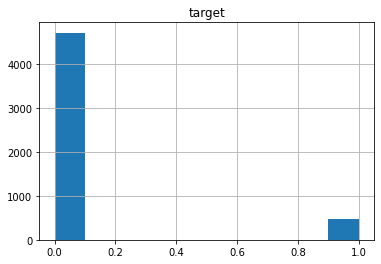

In [148]:
sub.hist()

In [149]:
sub.to_csv("s.csv", index=False)